# Worksheet 05a: Working With Factors & Tibble Joins
_**Leader**: Almas Khan **Reviewer:** Diana Lin **ASDA Assist**: David Kepplinger_

**Version 1.0** - Delivered Sunday, October 11, 2020

This is the corresponding worksheet for Class 10 (Oct 13, 2020) & Class 11 (Oct 15, 2020).

For marking purposes, we will need the packages below.
Remember to pay attention to the variable name to store your answer in, or else it will not be autograded correctly.
To ensure everything works properly, remember to run all code cells, not just the ones with your answer.

If you want to use packages which are not yet installed, you can use the code cell below to install them.

In [1]:
# Install additional packages, e.g.
# install.packages("forcats")
# install.packages('tsibble')

Use the following code cell to load any additional packages you want to use for this worksheet.

In [2]:
# Load packages, e.g.
# library(devtools)
# library(tsibble)

Run the code cell below to load the packages.

In [3]:
library(testthat)
library(digest)

## TOPIC 1: Working With Factors in R

For the best experience working with factors in R, we will use the forcats package.

In [4]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(forcats))
suppressPackageStartupMessages(library(gapminder))

In [5]:
gapminder

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


### Question 1: Creating Factors

Let's look again into `gapminder` dataset and create a new column, `life_level`, that contains five categories ("very high", "high","moderate", "low" and "very low") based on life expectancy in 1997.
Assign categories according to the table below:

| Criteria          |`life_level`   | 
|-------------------|-------------|
| less than 23      | very low    |
| between 23 and 48 | low         |
| between 48 and 59 | moderate    |
| between 59 and 70 | high        |
| more than 70      | very high   |

#### Question 1.1

Create a new data set for the year 1997 by first filtering by the year and the adding a new column `life_level` according to the table above.

Store this new data frame in variable `gapminder_1997`.

**Hint**: We are using `case_when()`, a tidier way to vectorise multiple `if_else()` statements.
You can read more about this function [in the tidyverse reference](https://dplyr.tidyverse.org/reference/case_when.html).

```
(gapminder_1997 <- gapminder %>% 
   FILL_THIS_IN(year == FILL_THIS_IN) %>% 
   FILL_THIS_IN(life_level = case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                 TRUE ~ "very high")))
```

In [6]:
# your code here
(gapminder_1997 <- gapminder %>% 
   filter(year == 1997) %>% 
   mutate(life_level = case_when(lifeExp < 23 ~ "very low",
                                 lifeExp < 48 ~ "low",
                                 lifeExp < 59 ~ "moderate",
                                 lifeExp < 70 ~ "high",
                                 TRUE ~ "very high")))

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<chr>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high
Austria,Europe,1997,77.510,8069876,29095.9207,very high
Bahrain,Asia,1997,73.925,598561,20292.0168,very high
Bangladesh,Asia,1997,59.412,123315288,972.7700,high


In [7]:
test_that("Question 1.1", expect_known_hash(table(gapminder_1997$life_level), "3d2e691667d4706e66ce5784bb1d7042"))
print("Success!")

[1] "Success!"


We can now plot boxplots for the GDP per capita per level of life expectancy.
Run the following code to see the boxplots.

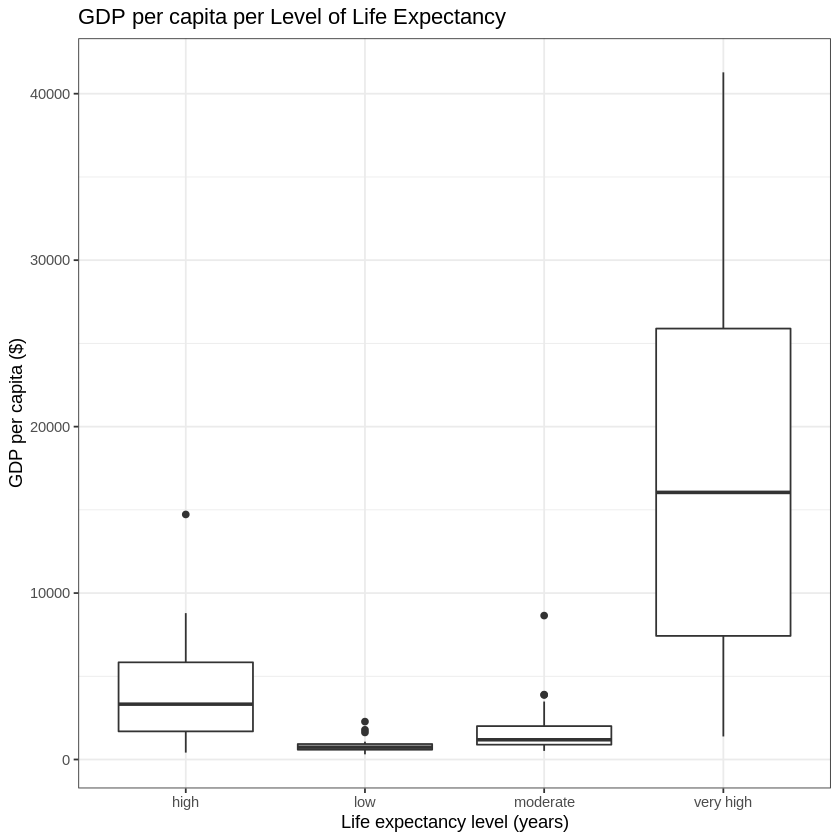

In [8]:
ggplot(gapminder_1997) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x= "Life expectancy level (years)") +
  ggtitle("GDP per capita per Level of Life Expectancy") +
  theme_bw() 

We notice a few oddities here:

- It seems that none of the countries had a "very low" life-expectancy in 1997. 
- However, since it was an option in our analysis it should be included in our plot. Right?
- Notice also how levels on x-axis are placed in the "wrong" order. (in alphabetical order)

#### Question 1.2

You can correct these issues by explicitly making `life_level` a factor and setting the levels parameter.
Create a new data frame as in Question 1.1, but make the column `life_level` a factor with levels ordered from *very low* to *very high*.
Store this new data frame in variable `gapminder_1997_fct`.

```
(gapminder_1997_fct <- gapminder %>% 
   FILL_THIS_IN(year == 1997) %>% 
   FILL_THIS_IN(life_level = FILL_THIS_IN(case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                        TRUE ~ "very high"),
                              levels = c('FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN'))))
```

In [47]:
# your code here

(gapminder_1997_fct <- gapminder %>% 
   filter(year == 1997) %>% 
   mutate(life_level = factor(case_when(lifeExp < 23 ~ "very low",
                                 lifeExp < 48 ~ "low",
                                 lifeExp < 59 ~ "moderate",
                                 lifeExp < 70 ~ "high",
                                 TRUE ~ "very high"),
                              levels = c("very low", "low", "moderate", "high", "very high"))))

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high
Austria,Europe,1997,77.510,8069876,29095.9207,very high
Bahrain,Asia,1997,73.925,598561,20292.0168,very high
Bangladesh,Asia,1997,59.412,123315288,972.7700,high


In [48]:
test_that("Question 1.2", expect_known_hash(table(gapminder_1997_fct$life_level), "8e62f09fbd0756d7e69d1bc95715d333"))
print("Success!")

[1] "Success!"


Run the following code to see the boxplots from the new data frame with life expectancy level as factor.

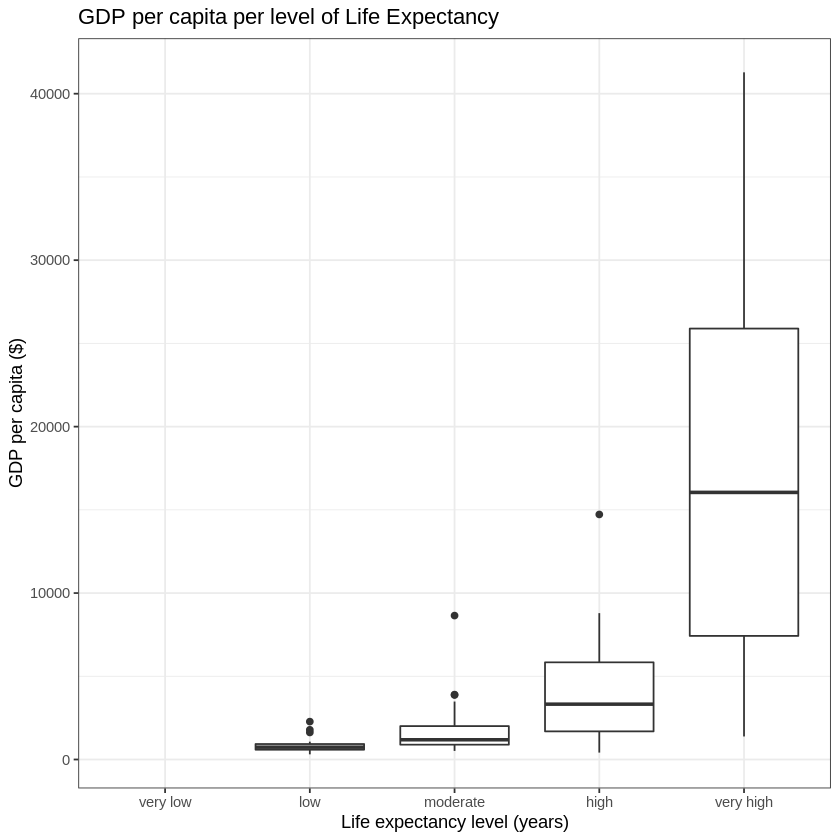

In [49]:
ggplot(gapminder_1997_fct) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x= "Life expectancy level (years)") +
  scale_x_discrete(drop = FALSE) + # Don't drop the very low factor
  ggtitle("GDP per capita per level of Life Expectancy") +
  theme_bw() 

### Question 2: Inspecting Factors

In Question 1, you created our own factors, so now let's explore what categorical variables are in the `gapminder` dataset.

#### Question 2.1

What levels does the column `continent` have?
Assign the levels to variable `continent_levels`.

```
(continent_levels <- FILL_THIS_IN(gapminder$FILL_THIS_IN))
```

In [50]:
# your code here
(continent_levels <- levels(gapminder$continent))

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania"

In [51]:
test_that("Question 2.1", expect_known_hash(continent_levels, "6926255b7f073fb8e7d89773802102a6"))
print("Success!")

[1] "Success!"


#### Question 2.2

How many levels does the column `country` have?
Assign the number of levels to variable `gap_nr_countries`.

```
(gap_nr_countries <- FILL_THIS_IN(gapminder$FILL_THIS_IN))
```

In [56]:
# your code here
(gap_nr_countries <- nlevels(gapminder$country))

[1] 142

In [57]:
test_that("Question 2.2", expect_known_hash(as.integer(gap_nr_countries), "3b6d002135d8d45a3c5f4a9fb857c323"))
print("Success!")

[1] "Success!"


#### Question 2.3

Consider we are only interested in the following 5 countries: Egypt, Haiti, Romania, Thailand, and Venezuela.
Create a new data frame with only these 5 countries and store it in variable `gap_5`.

```
(gap_5 <- gapminder %>%
   FILL_THIS_IN(FILL_THIS_IN %in% c("FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN")))
```

In [59]:
# your code here
(gap_5 <- gapminder %>%
   filter(country %in% c( "Egypt", "Haiti", "Romania", "Thailand", "Venezuela")))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.8224
Egypt,Africa,1957,44.444,25009741,1458.9153
Egypt,Africa,1962,46.992,28173309,1693.3359
Egypt,Africa,1967,49.293,31681188,1814.8807
Egypt,Africa,1972,51.137,34807417,2024.0081
Egypt,Africa,1977,53.319,38783863,2785.4936
Egypt,Africa,1982,56.006,45681811,3503.7296
Egypt,Africa,1987,59.797,52799062,3885.4607
Egypt,Africa,1992,63.674,59402198,3794.7552


In [60]:
test_that("Question 2.3", {
  expect_known_hash(dim(gap_5), "6c0f8c2a8d488051f33fc89b2c327dcd")
  expect_known_hash(table(gap_5$country), "05b8ca3033e94f96b9ec5422a69c1207")
})
print("Success!")

[1] "Success!"


#### Question 2.4

However, sub-setting the data set does not affect the levels of the factors.
The column `country` in data frame `gap_5` still has the same number of levels as in the original data frame.
Create a new data frame from `gap_5`, but drop all unused levels from column `country`.
Store new new data frame in variable `gap_5_dropped`.

```
(gap_5_dropped <- gap_5 %>% FILL_THIS_IN())
```

In [64]:
# your code here
(gap_5_dropped <- gap_5 %>% droplevels())

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.8224
Egypt,Africa,1957,44.444,25009741,1458.9153
Egypt,Africa,1962,46.992,28173309,1693.3359
Egypt,Africa,1967,49.293,31681188,1814.8807
Egypt,Africa,1972,51.137,34807417,2024.0081
Egypt,Africa,1977,53.319,38783863,2785.4936
Egypt,Africa,1982,56.006,45681811,3503.7296
Egypt,Africa,1987,59.797,52799062,3885.4607
Egypt,Africa,1992,63.674,59402198,3794.7552


In [65]:
test_that("Question 2.4", expect_known_hash(sort(levels(gap_5_dropped$country)), "ac97b9af845a59395697b028c5121503"))
print("Success!")

[1] "Success!"


#### Question 2.5

The factor levels of column `continent` in data frame `gapminder` are ordered alphabetically.
Create a new data frame, with the levels of column `continent` in *decreasing* order according to their frequency (i.e., the number of rows for each continent).
Store the new data frame in variable `gap_continent_freq`.

```
(gap_continent_freq <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN(continent))))
```

In [83]:
# your code here
(gap_continent_freq <- gapminder %>%
   mutate(continent = fct_rev(fct_infreq(continent))))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


In [84]:
test_that("Question 2.5", expect_known_hash(table(gap_continent_freq$continent), "0bb23ea87ce71deb5452eaae8cdbf7cf"))
print("Success!")

[1] "Success!"


#### Question 2.6

Again based on the `gapminder` data set, create another data frame, with the levels of column `continent` in *increasing* order of their average life expectancy (from column `lifeExp`).
Store the new data frame in variable `gap_continent_life`.

```
(gap_continent_life <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN, FILL_THIS_IN)))
```

In [94]:
# your code here
(gap_continent_life <- gapminder %>%
   mutate(continent = fct_reorder(continent, lifeExp, fun = mean)))

ERROR: Error: Problem with `mutate()` input `continent`.
[31m✖[39m 1 components of `...` were not used.

We detected these problematic arguments:
* `fun`

Did you misspecify an argument?
[34mℹ[39m Input `continent` is `fct_reorder(continent, lifeExp, fun = mean)`.


In [91]:
test_that("Question 2.6", expect_known_hash(table(gap_continent_life$continent), "7688676a0807063f1bfa5b4cc721c2d9"))
print("Success!")

ERROR: Error: Test failed: 'Question 2.6'
* object 'gap_continent_life' not found
[1mBacktrace:[22m
[90m 1. [39mtestthat::expect_known_hash(...)
[90m 4. [39mbase::table(gap_continent_life$continent)


#### Question 2.7

Consider now you want to make comparisons between countries, relative to Canada.
Create a new data frame, with the levels of column `country` rearranged to have Canada as the first one.
Store the new data frame in variable `gap_canada_base`.

```
(gap_canada_base <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "FILL_THIS_IN")))
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that("Question 2.7", expect_known_hash(table(gap_canada_base$country), "72d75ce05a16d8965f7bd0ae3fb986d3"))
print("Success!")

#### Question 2.8

Sometimes you want to manually change a few factor levels, e.g., if the level is too wide for plotting.
Based on the `gapminder` data set, create a new data frame with the Central African Republic renamed to *Central African Rep.* and Bosnia and Herzegovina renamed to *Bosnia & Herzegovina*.
Store the new data frame in variable `gap_car`.

```
(gap_car <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "Central African Rep." = "FILL_THIS_IN",
                               "Bosnia & Herzegovina" = "FILL_THIS_IN")))
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that("Question 2.8", expect_known_hash(table(gap_car$country), "9cc15f09cb70b5596bbf3feaa73ee471"))
print("Success!")

## TOPIC 2: Tibble Joins

### Question 3

Run the following R code to load the data (extracted from the R package [singer](https://github.com/JoeyBernhardt/singer)).

In [95]:
suppressMessages({
  time <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/songs.csv") %>% rename(song = title)
  album <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/loc.csv") %>% select(title, everything()) %>% rename(song = title, album = release)
})

These two data sets contain information about a few popular songs and albums.
Run the following R codes to look at the two data sets:

In [96]:
time

song,artist_name,year
<chr>,<chr>,<dbl>
Corduroy,Pearl Jam,1994
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996
It's Lulu,The Boo Radleys,1995
Sparrow,The Boo Radleys,1992
Martin_ Doom! It's Seven O'Clock,The Boo Radleys,1995


In [97]:
album

song,artist_name,city,album
<chr>,<chr>,<chr>,<chr>
Grievance,Pearl Jam,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,"Seattle, WA",No Code
MFC,Pearl Jam,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,"Seattle, WA",Seattle Washington November 5 2000
Stuck On Amber,The Boo Radleys,"Liverpool, England",Wake Up!
It's Lulu,The Boo Radleys,"Liverpool, England",Best Of
Sparrow,The Boo Radleys,"Liverpool, England",Everything's Alright Forever
High as Monkeys,The Boo Radleys,"Liverpool, England",Kingsize


#### Question 3.1
We really care about the songs in `time`.
Bot for which of the songs do we know the corresponding album?
Create a new data frame with all songs from `time` and the information on the corresponding album.
This new data frame should contain only the songs with a corresponding album.
Store the joined data set in variable `songs_with_album`.

```
(songs_with_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN")))
```

In [98]:
# your code here
(songs_with_album <- time %>% 
  semi_join(album, by = c("song", "artist_name")))

song,artist_name,year
<chr>,<chr>,<dbl>
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996
It's Lulu,The Boo Radleys,1995
Sparrow,The Boo Radleys,1992
High as Monkeys,The Boo Radleys,1998
Butterfly McQueen,The Boo Radleys,1993


In [99]:
test_that("Question 3.1", {
  expect_known_hash(sort(songs_with_album$song), "146ff293a74ccc1ad24505a6bc0b6682")
  expect_known_hash(table(songs_with_album$artist_name), "51f7daeec65e839e5ae6c84ac5a1cb70")
})
print("Success!")

[1] "Success!"


#### Question 3.2
Go ahead and add the corresponding albums to the `time` tibble, being sure to preserve rows even if album info is not readily available.
Store the joined data set in variable `all_songs`.

```
(all_songs <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN")))
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that("Question 3.2", {
  expect_known_hash(sort(all_songs$song), "dd1c0b2e14a879cb1a6f07077ed38e97")
  expect_known_hash(all_songs$album[order(all_songs$song)], "2baea3c1a23797fdac5a9e0dc119073e")
})
print("Success!")

#### Question 3.3: Joining Rows by Columns
Create a new data frame with songs from `time` for which there is no album info.
Store the new data set in variable `songs_without_album`.

```
(songs_without_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN")))
```

In [100]:
# your code here
(songs_without_album <- time %>% 
  semi_join(album, by = c("song", "artist_name")))

song,artist_name,year
<chr>,<chr>,<dbl>
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996
It's Lulu,The Boo Radleys,1995
Sparrow,The Boo Radleys,1992
High as Monkeys,The Boo Radleys,1998
Butterfly McQueen,The Boo Radleys,1993


In [101]:
test_that("Question 3.3", expect_known_hash(sort(songs_without_album$song), "146ff293a74ccc1ad24505a6bc0b6682"))
print("Success!")

[1] "Success!"


#### Question 3.4
Create a new data frame with *all* songs from artists for which there is no album information.
Store the new data set in variable `songs_artists_no_album`.

```
(songs_artists_no_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = "FILL_THIS_IN"))
```

In [102]:
# your code here
(songs_artists_no_album <- time %>% 
  anti_join(album, by = "artist_name"))

song,artist_name,year
<chr>,<chr>,<dbl>
Mine Again,Mariah Carey,2005
Don't Forget About Us,Mariah Carey,2005
Babydoll,Mariah Carey,1997
Don't Forget About Us,Mariah Carey,2005
Vision Of Love,Mariah Carey,1990


In [103]:
test_that("Question 3.4", expect_known_hash(table(songs_artists_no_album$artist_name), "244510c51477c31e6e795cbc0ca0b0d7"))
print("Success!")

[1] "Success!"


#### Question 3.5
Create a new data frame with all the information from both tibbles, regardless of no corresponding information being present in the other tibble.
Store the new data set in variable `all_songs_and_albums`.

```
(all_songs_and_albums <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN")))
```

In [104]:
# your code here
(all_songs_and_albums <- time %>% 
  full_join(album, by = c("song", "artist_name")))

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Corduroy,Pearl Jam,1994,NA,NA
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000
It's Lulu,The Boo Radleys,1995,"Liverpool, England",Best Of
Sparrow,The Boo Radleys,1992,"Liverpool, England",Everything's Alright Forever
Martin_ Doom! It's Seven O'Clock,The Boo Radleys,1995,NA,NA


In [105]:
test_that("Question 3.5", {
  expect_known_hash(sort(all_songs_and_albums$song), "ba2ba3507e50c56d21028893404259a5")
  expect_known_hash(with(all_songs_and_albums, album[order(song)]), "dbc70af8d3078ea830be9cfb0dee6b9d")
  expect_known_hash(with(all_songs_and_albums, year[order(song)]), "10669b0750ab4d53b54f0e509430e2d1")
})
print("Success!")

[1] "Success!"


### Question 4: Concatenating Rows

Run the following R code to load the three Lord of the Rings tibbles that we saw a few times already.

In [106]:
suppressMessages({
  fell <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Fellowship_Of_The_Ring.csv")
  ttow <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Two_Towers.csv")
  retk <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Return_Of_The_King.csv")
})

Run the following R codes to take a look at the 3 tibbles:

In [107]:
fell

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Fellowship Of The Ring,Elf,1229,971
The Fellowship Of The Ring,Hobbit,14,3644
The Fellowship Of The Ring,Man,0,1995


In [108]:
ttow

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Two Towers,Elf,331,513
The Two Towers,Hobbit,0,2463
The Two Towers,Man,401,3589


In [109]:
retk

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Return Of The King,Elf,183,510
The Return Of The King,Hobbit,2,2673
The Return Of The King,Man,268,2459


#### Question 4.1

Combine the three data sets into a single tibble, storing the new tibble in variable `lotr`.

```
(lotr <- FILL_THIS_IN(fell, ttow, retk))
```

In [110]:
# your code here
(lotr <- bind_rows(fell, ttow, retk))

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Fellowship Of The Ring,Elf,1229,971
The Fellowship Of The Ring,Hobbit,14,3644
The Fellowship Of The Ring,Man,0,1995
The Two Towers,Elf,331,513
The Two Towers,Hobbit,0,2463
The Two Towers,Man,401,3589
The Return Of The King,Elf,183,510
The Return Of The King,Hobbit,2,2673
The Return Of The King,Man,268,2459


In [111]:
test_that("Question 4.1", expect_known_hash(table(lotr$Film), "41c29122f6c217d447e85a9069f5a92f"))
print("Success!")

[1] "Success!"


#### Question 4.2

Create a new data set with all races that are present in "The Fellowship of the Ring" (`fell`), but not in any of the other ones.
Store the new data frame in variable `only_fell`.

```
(only_fell <- fell %>% 
  FILL_THIS_IN(ttow, by = "Race") %>% 
  FILL_THIS_IN(retk, by = "Race"))
```

In [112]:
# your code here
(only_fell <- fell %>% 
  anti_join(ttow, by = "Race") %>% 
  anti_join(retk, by = "Race"))

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>


In [113]:
test_that("Question 4.2", expect_known_hash(dim(only_fell), "d1e54b618e5808b540dbdfbb7f75026f"))
print("Success!")

[1] "Success!"


### Question 5: Set Operations

Let's use three set functions: `intersect()`, `union()` and `setdiff()`.
They work for data frames with the same column names.

We'll work with two toy tibbles named `y` and `z`, similar to the Data Wrangling Cheatsheet.

Run the following R codes to create the data.

In [114]:
(y <-  tibble(x1 = LETTERS[1:3], x2 = 1:3))

x1,x2
<chr>,<int>
A,1
B,2
C,3


In [115]:
(z <- tibble(x1 = c("B", "C", "D"), x2 = 2:4))

x1,x2
<chr>,<int>
B,2
C,3
D,4


#### Question 5.1

Use one of the three methods mentioned above to create a new data set which contains all rows that appear in both `y` and `z`.
Store the new data frame in variable `in_both`

```
(in_both <- FILL_THIS_IN(y, z))
```

In [116]:
# your code here
(in_both <- intersect(y, z))

x1,x2
<chr>,<int>
B,2
C,3


In [117]:
test_that("Question 5.1", expect_known_hash(in_both$x1, "745ec49ab3231655a04484be44a15f98"))
print("Success!")

[1] "Success!"


#### Question 5.2
Assume that rows in `y` are from *Day 1* and rows in `z` are from *Day 2*.
Create a new data set with all rows from `y` and `z`, as well as an additional column `day` which is *Day 1* for rows from `y` and *Day 2* for rows from `z`.
Store the new data set in variable `both_days`.

```
(both_days <- FILL_THIS_IN(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
))
```

In [118]:
# your code here
(both_days <- bind_rows(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
))

x1,x2,day
<chr>,<int>,<chr>
A,1,Day 1
B,2,Day 1
C,3,Day 1
B,2,Day 2
C,3,Day 2
D,4,Day 2


In [119]:
test_that("Question 5.2", expect_known_hash(with(both_days, x1[order(x2, day)]), "66b9eefd39c2f0b5d130453c139a2051"))
print("Success!")

[1] "Success!"


#### Question 5.3

The rows contained in `z` are bad.
Use one of the three methods mentioned above to create a new data set which contains only the rows from `y` which are not in `z`.
Store the new data frame in variable `only_y`

```
(only_y <- FILL_THIS_IN(y, z))
```

In [120]:
# your code here
(only_y <- setdiff(y, z))

x1,x2
<chr>,<int>
A,1


In [121]:
test_that("Question 5.3", expect_known_hash(only_y$x1, "75f1160e72554f4270c809f041c7a776"))
print("Success!")

[1] "Success!"


### Question 6- Dates and Tsibble 

We're going to take a look at the Tsibble package and how it works with dates. Let's first load this package. 

#### Question 6.1

In [ ]:
#install.packages("tsibble")
suppressPackageStartupMessages(library(tsibble))

Next let's take a look at the built in presidential dataset that looks at the start and ending terms of US presidents. 

In [ ]:
presidential

Using `tsibble` to convert the existing start and end column dates into only year and month. Name this tibble
`president_ym`.

```
(president_ym <- presidential %>%
 mutate(start=FILL_THIS_IN(start), end=FILL_THIS_IN(end)))
```


In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that("Question 6.1", expect_known_hash(president_ym[1,], "8b9ac24bc52a692ab7d1bd83f9e0a19c"))
print("Success!")